In [7]:
"""Solve
u_t + (u^2 / 2)_x = 0 on [-1, 6]
with fixed boundary conditions.
"""

'Solve\nu_t + (u^2 / 2)_x = 0 on [-1, 6]\nwith fixed boundary conditions.\n'

In [8]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
# Initial Conditions
def step(x):
    u = np.zeros(x.shape)
    for j in range(len(x)):
        if x[j] < 0:
            u[j] = 2.0
        elif (x[j] >= 0) and (x[j] <= 1):
            u[j] = 2.0 - x[j]
        else:
            u[j] = 1.0
    return u

# Exact rarefaction to compare
def exact_rarefaction(x, t):
    u = np.zeros_like(x)
    if t < 1:
        u[x < 2*t] = 2.0
        mask_linear = (x >= 2*t) & (x <= 1+t)
        u[mask_linear] = (2 - x[mask_linear])/(1-t)
        u[x > 1+t] = 1.0
    else:
        x_s = 2 + 1.5*(t-1)
        u[x < x_s] = 2.0
        u[x >= x_s] = 1.0
    return u

end_time = 2.0
gamma = 0.95
nx = 128

T = 2
tsteps = 39
    hx = 0.0546875
    ht = 0.0512821
lambda = 0.95


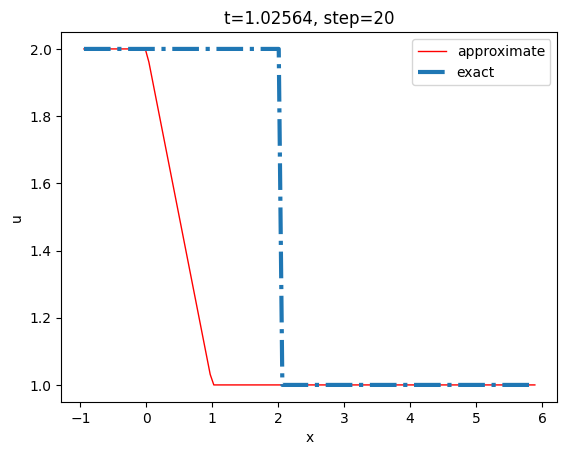

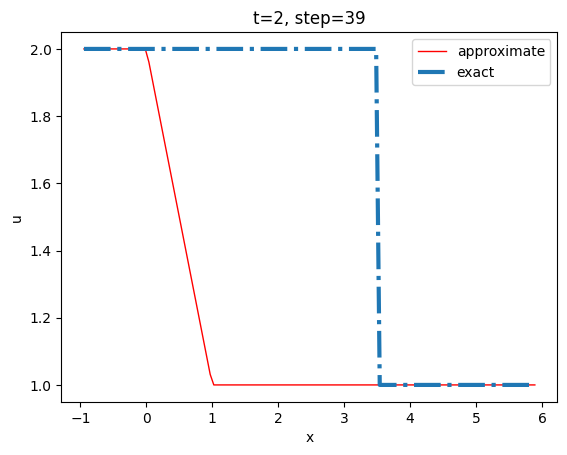

In [10]:
x, hx = np.linspace(-1, 6, nx, endpoint=False, retstep=True)
# Ghost cell mask: pretend first and last DoF are ghost cells
mask = np.ones(len(x), dtype=bool)
mask[:1] = mask[-1:] = False
# Indexing arrays
K = np.arange(0, nx)    # 0, ..., nx-1
Km1 = np.roll(K, 1)     # nx-1, 0, 1, ..., nx-2
Kp1 = np.roll(K, -1)    # 1, ..., nx

ht = hx * gamma
nt = int(np.ceil(end_time / ht))
ht = end_time / nt

print('T = %g' % end_time)
print('tsteps = %d' % nt)
print('    hx = %g' % hx)
print('    ht = %g' % ht)
print('lambda = %g' % gamma)

u = step(x)
u0 = u.copy()

def f(u):
    return u**2/2

def fprime(u):
    return u

for n in range(1, nt+1):
    # (Here you would implement the update for u using LLF, Godunov, or RK2 schemes.)
    # For demonstration purposes, we leave u unchanged.

    # Compute the exact solution at the current time
    time = n * ht
    uexact = exact_rarefaction(x, time)

    # Plot the computed (approximate) and exact solution at t = 1 and t = 2.
    if abs(time - 1.) < ht/2 or abs(time - 2.) < ht/2:
        plt.figure()
        plt.title('t=%g, step=%d' % (time, n))
        plt.plot(x[mask], u[mask], 'r-', linewidth=1, label='approximate')
        plt.plot(x[mask], uexact[mask], '-.', linewidth=3, label='exact')
        plt.xlabel('x')
        plt.ylabel('u')
        plt.legend()
        plt.show()


